# Dasharath Ab  

# Business Case: Netflix - Data Exploration & Visualisation :

In [1]:
#importing different libaries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')

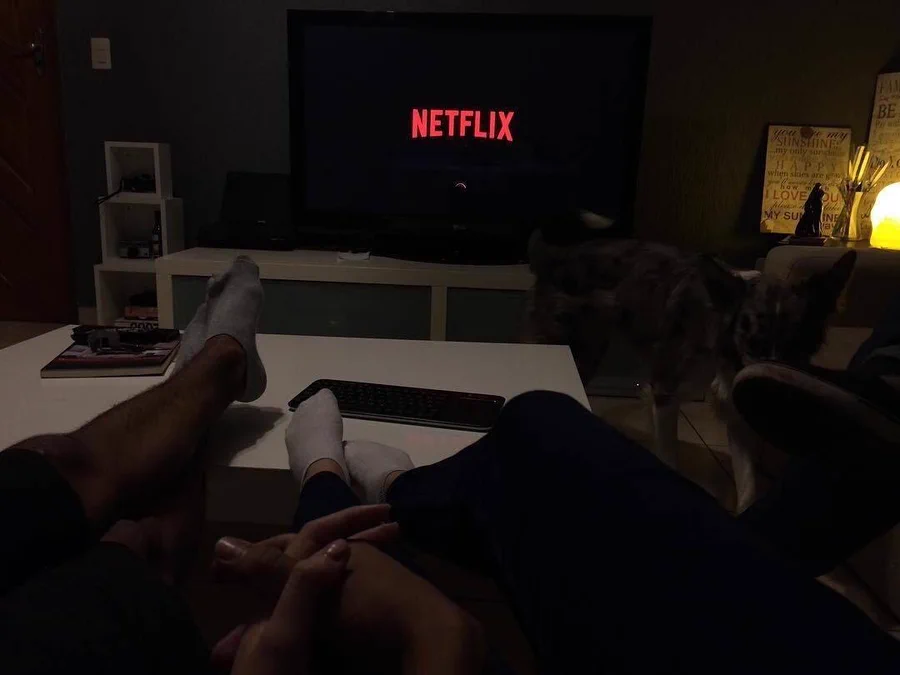

In [3]:
# load the dataset
df=pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


###  **Attributes information:**
- Show ID : The ID of the show
- Type: Identifier - A Movie or TV Show
- Title: Title of the Movie / Tv Show
- Director: Director of the Movie
- Cast: Actors involved in the movie/show
- Country: Country where the movie/show was produced
- Date_added: Date it was added on Netflix
- Release_year: Actual Release year of the movie/show
- Rating: TV Rating of the movie/show
- Duration: Total Duration - in minutes or number of seasons
- Listed_in: Genre
- Description: The summary description


In [4]:
# shape of the dataset
df.shape   # checking the count of number of rows and columns

(8807, 12)

In [5]:
df.info()  #to check the data types of all columns and count of values in particular column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- Here we can see that `date_added`,`release_year` column is in object we should convert it into datetime
- more number of missing value in `cast`,`country`, `director`,`date_added`,`rating` and `duration`

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.describe()   #to check statistical summary of numerical type data

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


- 25% of the data falls below or equal to the year 2013, indicating that a significant portion of the content is from 2013 or earlier.
- 50% of the data (the median) falls below or equal to the year 2017, suggesting that half of the content is from 2017 or earlier.
- 75% of the data falls below or equal to the year 2019, indicating that 75% of the content is from 2019 or earlier.

**Insight**

- It can be observed that a considerable portion of the content in the dataset is relatively recent, with 25% of it belonging to the years 2019-2021. However, there is also a significant amount of content from earlier years, with 25% of it belonging to the years 1925-2013.

- The provided insight about adding the latest movies and TV shows to attract more customers seems appropriate, as it aligns with the fact that a substantial portion of the content is from recent years. Offering a mix of both older and newer content could cater to a wider audience and potentially attract more customers.

In [8]:
df.describe(include='object')  #to check statistical summary of categorical type data

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


**Conclusion**
- `Show_id` and `Title` are the unique factors.
<!-- - `Type` and `rating` column needs to be changed to categorical data -->
- `United States` is having the maximun content available.

In [9]:
df.size  # there are total 105684 elements in dataset

105684

In [10]:
df.columns   # to show each column

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# we can drop show_id and description column 
df.drop(columns=['show_id','description'],inplace=True)

In [12]:
# change the name cast to actor and listed_in to genres boz easy to read
df.rename(columns={'cast':'actor','listed_in':'genres'},inplace=True)

In [13]:
df.dtypes   # it shows the data type of each column

type            object
title           object
director        object
actor           object
country         object
date_added      object
release_year     int64
rating          object
duration        object
genres          object
dtype: object

<AxesSubplot: >

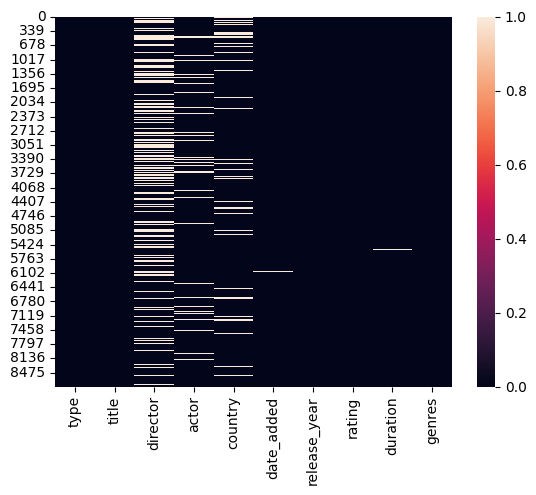

In [14]:
# here we can see null values using seaborn library 
sns.heatmap(df.isnull())

In [15]:
df['rating'].unique()
# in rating column we have 3 minutes value which matches the duration column replace it in duration column

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [16]:
df[df['duration'].isna()]  # here u can see it clearly replace the rating column in duration

,type,title,director,actor,country,date_added,release_year,rating,duration,genres
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies


In [17]:
df.loc[df['director']=='Louis C.K.','duration'] = df['rating']

In [18]:
df.loc[df['director']=='Louis C.K.']

,type,title,director,actor,country,date_added,release_year,rating,duration,genres
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies


In [19]:
# now make rating column as NaN  so that we can fill with it mode of rating column
df.loc[df['director']=='Louis C.K.','rating'] = np.NaN
df.loc[df['director']=='Louis C.K.']

,type,title,director,actor,country,date_added,release_year,rating,duration,genres
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies


# Basic Analysis
### 1. Un-nesting the columns
-  Un-nest the columns those have cells with multiple comma separated values by creating multiple rows

In [20]:
# here in our dataset actor,title and director are having the comma separated values 
# Un-nest the "Actor," "Title," and "Director" columns by creating multiple rows for each item
# make copy of orginal dataframe to data so that we can analyze

df['actor'] = df['actor'].str.split(', ').explode('actor')
df['title'] = df['title'].str.split(', ').explode('title')
df['director'] = df['director'].str.split(', ').explode('director')
df['country'] = df['country'].str.split(', ').explode('country')
df['genres']=df['genres'].str.split(', ').explode('genres')

### 2. Handling null values
- For categorical variables with null values, update those rows as unknown_column_name.
- Example : Replace missing value with Unknown Actor for missing value in Actors column.
- Replace with 0 for continuous variables having null values. 

In [21]:
#Conversion of categorical attributes to 'category' and 'datetime'
df['date_added'] = pd.to_datetime(df['date_added'])
df['release_year'] = pd.to_datetime(df['release_year'],format='%Y')

# filling the missing value with release_year
df["date_added"].fillna(df["release_year"].astype(str), inplace=True)

# fill the value unknown to director,cast and country 
df['director'].fillna('Unknown Director', inplace=True)
df['actor'].fillna('Unknown Actor', inplace=True)
df['country'].fillna('Unknown Country',inplace=True)

# fill the rating column with mode will fill missing values with the most frequent rating in the dataset
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [22]:
# now all null values are replaced
df.isna().sum()

type            0
title           0
director        0
actor           0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
dtype: int64

In [23]:
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
# df['day_name'] = df['date_added'].dt.day_name()
df['week'] = df['date_added'].dt.week

In [24]:
#  now remove the duplicated rows 
print(len(df[df.duplicated()]))
df[df.duplicated()]


0


,type,title,director,actor,country,date_added,release_year,rating,duration,genres,year,month,week


- there are no duplicates row 


In [25]:
# after analyzing our dataset 
df.shape # before our dataset was having shape of (8807, 12) after analyzing the dataset it has been change to (8807,13)

(8807, 13)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      8807 non-null   object        
 3   actor         8807 non-null   object        
 4   country       8807 non-null   object        
 5   date_added    8807 non-null   datetime64[ns]
 6   release_year  8807 non-null   datetime64[ns]
 7   rating        8807 non-null   object        
 8   duration      8807 non-null   object        
 9   genres        8807 non-null   object        
 10  year          8807 non-null   int64         
 11  month         8807 non-null   int64         
 12  week          8807 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(8)
memory usage: 894.6+ KB


In [27]:
df.head()

,type,title,director,actor,country,date_added,release_year,rating,duration,genres,year,month,week
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,2021,9,38
1,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,International TV Shows,2021,9,38
2,TV Show,Ganglands,Julien Leclercq,Khosi Ngema,Unknown Country,2021-09-24,2021-01-01,TV-MA,1 Season,TV Dramas,2021,9,38
3,TV Show,Jailbirds New Orleans,Unknown Director,Gail Mabalane,Unknown Country,2021-09-24,2021-01-01,TV-MA,1 Season,TV Mysteries,2021,9,38
4,TV Show,Kota Factory,Unknown Director,Thabang Molaba,India,2021-09-24,2021-01-01,TV-MA,2 Seasons,Crime TV Shows,2021,9,38


In [28]:
df.tail()

,type,title,director,actor,country,date_added,release_year,rating,duration,genres,year,month,week
8802,Movie,Ugly Duckling,Akiva Goldsman,Hindia,United States,2019-11-20,2007-01-01,R,158 min,Action & Adventure,2019,11,47
8803,TV Show,Una,Arjun Gourisaria,Ardhito Pramono,Mexico,2019-07-01,2018-01-01,TV-Y7,2 Seasons,Comedies,2019,7,27
8804,Movie,Unaccompanied Minors,Moinak Biswas,Rio Dewanto,South Korea,2019-11-01,2009-01-01,R,88 min,Dramas,2019,11,44
8805,Movie,Unacknowledged,Chatchai Katenut,Angga Dwimas Sasongko,United States,2020-01-11,2006-01-01,PG,88 min,Crime TV Shows,2020,1,2
8806,Movie,Under an Arctic Sky,Manussa Vorasingha,Rachel Amanda,United Kingdom,2019-03-02,2015-01-01,TV-14,111 min,International TV Shows,2019,3,9


# What does ‘good’ look like?

## Q1. Find the counts of each categorical variable both using graphical and nongraphical analysis.

### a. For Non-graphical Analysis:

In [30]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [31]:
df['title'].value_counts()[:10]

Love         7
Explained    6
Hello        4
Oh           2
Chelsea      2
Berlin       2
Lock         2
Aram         2
Sister       2
Yes          2
Name: title, dtype: int64

In [32]:
director = df[df['director']!='Unknown Director']
director['director'].value_counts()[:10]

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Youssef Chahine        12
Cathy Garcia-Molina    12
Jay Chapman            12
Martin Scorsese        10
Name: director, dtype: int64

In [33]:
actor = df[df['actor']!='Unknown Actor']
actor['actor'].value_counts()[:10]

Julie Tejwani     22
Rupa Bhimani      22
Rajesh Kava       21
Jigna Bhardwaj    19
Vatsal Dubey      17
Swapnil           14
Mousam            14
Kazuhiko Inoue     8
Junko Takeuchi     8
Chie Nakamura      8
Name: actor, dtype: int64

In [34]:
country = df[df['country'] != 'Unknown Country']
country['country'].value_counts()[:10]

United States     2894
India              858
United Kingdom     595
Canada             346
France             313
Japan              293
Spain              210
South Korea        203
Germany            186
Mexico             146
Name: country, dtype: int64

In [35]:
df['date_added'].value_counts()[:10]

2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
2019-10-01     62
2018-11-01     60
2021-07-01     60
2018-01-01     56
2021-09-01     56
Name: date_added, dtype: int64

In [36]:
df['release_year'].value_counts()[:10]

2018-01-01    1147
2017-01-01    1032
2019-01-01    1030
2020-01-01     953
2016-01-01     902
2021-01-01     592
2015-01-01     560
2014-01-01     352
2013-01-01     288
2012-01-01     237
Name: release_year, dtype: int64

In [37]:
df['rating'].value_counts()

TV-MA       3214
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [38]:
df['duration'].value_counts()[:10]

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: duration, dtype: int64

In [39]:
df['genres'].value_counts()[:10]

International Movies        1231
Dramas                      1029
Comedies                     761
International TV Shows       725
TV Dramas                    409
Action & Adventure           346
TV Comedies                  322
Children & Family Movies     313
Romantic Movies              303
Documentaries                278
Name: genres, dtype: int64

### b. For graphical analysis:

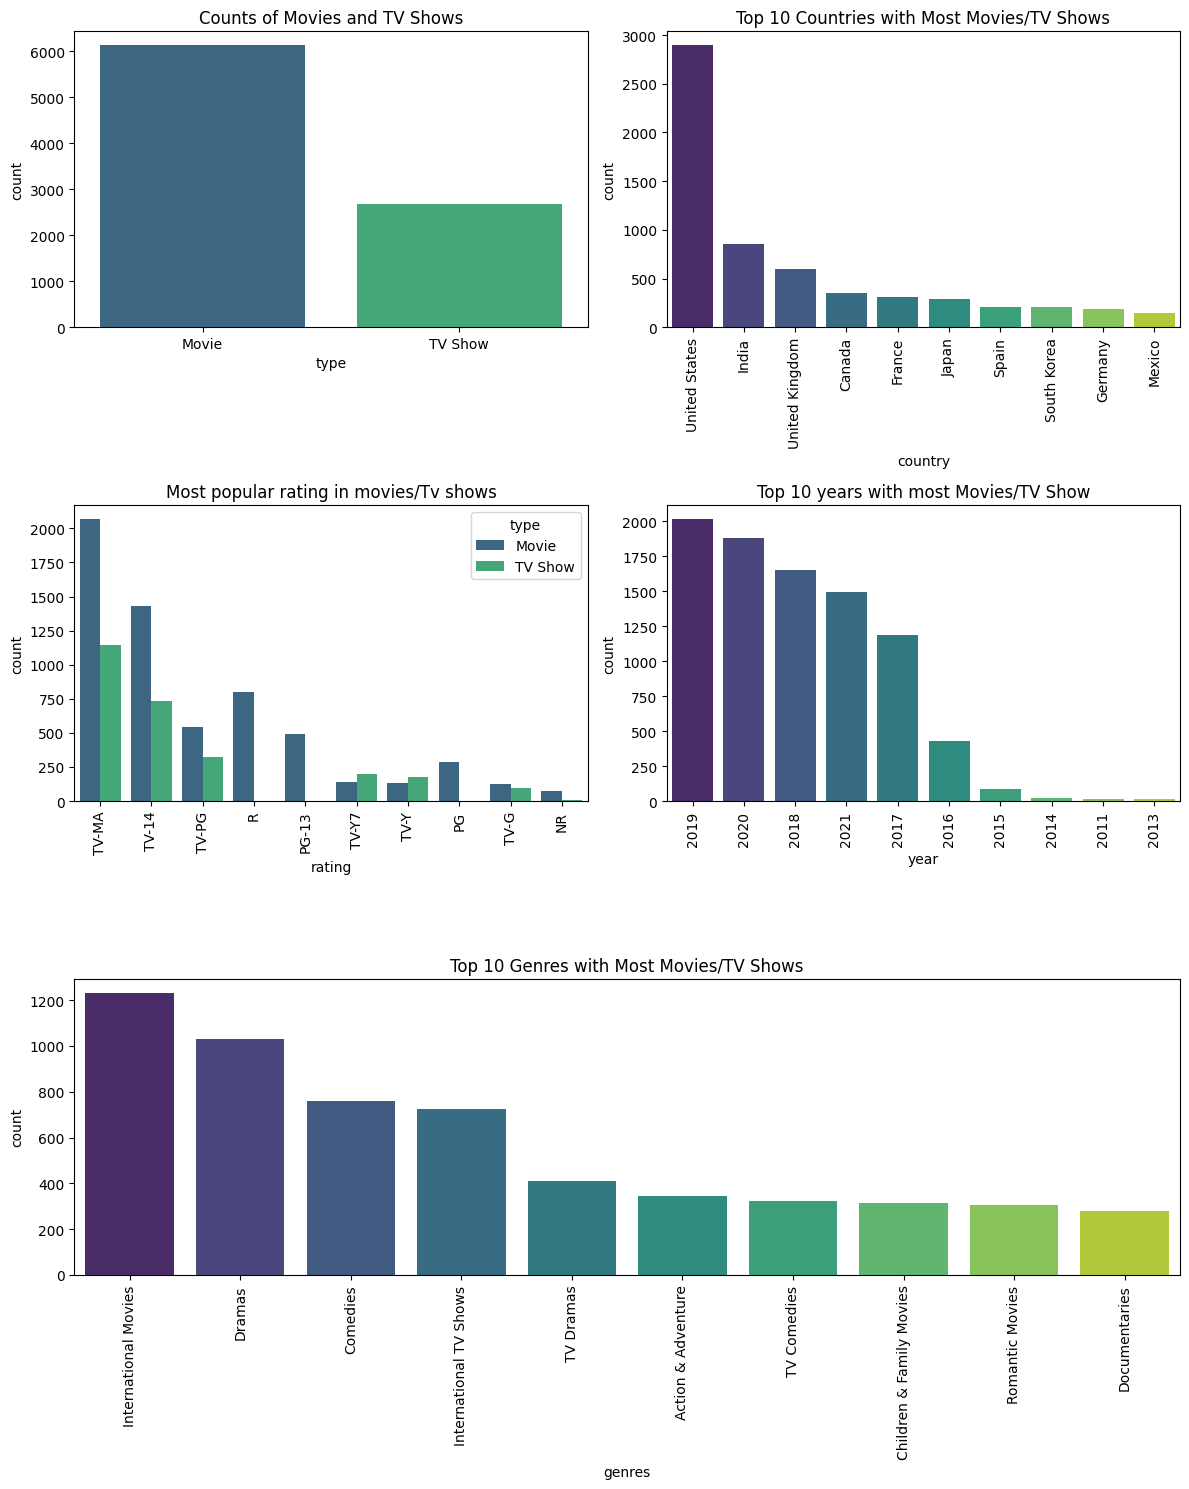

In [40]:
# Graphical analysis: Count plots for each category
# type  country rating  genres ,release_year,

# Counts of Movies and TV Shows
plt.figure(figsize=(12,15))
plt.subplot(3,2,1)
sns.countplot(data=df,x='type',palette='viridis')
plt.title('Counts of Movies and TV Shows')

# Top 10 Countries with Most Movies/TV Shows
plt.subplot(3,2,2)
sns.countplot(data=country,x='country',order=country['country'].value_counts().index[:10],palette='viridis')
plt.title('Top 10 Countries with Most Movies/TV Shows')
plt.xticks(rotation=90)

# Most popular rating in movies/Tv shows
plt.subplot(3,2,3)
sns.countplot(data=df,x='rating',order=df['rating'].value_counts().index[:10],hue='type',palette='viridis')
plt.title("Most popular rating in movies/Tv shows")  
plt.xticks(rotation=90)

# Top 10 years with most Movies/TV Show
plt.subplot(3,2,4)
sns.countplot(data=df,x='year',order=df['year'].value_counts().index[:10],palette='viridis')
plt.title('Top 10 years with most Movies/TV Show')
plt.xticks(rotation=90)

# Top 10 Genres with Most Movies/TV Shows
plt.subplot(3, 1, 3)
sns.countplot(data=df, x="genres", order=df["genres"].value_counts().index[:10],palette='viridis')
plt.title("Top 10 Genres with Most Movies/TV Shows")
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

### Based on the non-graphical analysis results, here are some insights and recommendations for Netflix:

**`Insights:`**

1. Content Type Distribution:
   - The dataset contains more movies (6131) than TV shows (2676) on Netflix.
   
2. Top Movies and TV Shows:
   - The top 10 most frequently available titles are dominated by movies, with Love  being the most common one (7 occurrences).
   
3. Directors and Actors:
   - The director with the most appearances in the dataset is Unknown Director, indicating that there are many titles without explicit director information.
   - Among the known directors, Rajiv Chilaka , Jan Sutera, and Raúl Campos  have the most appearances in the dataset 22,21 and 19 respectively.
 
4. Production Countries:
   - The United States is the top country with the most titles on Netflix (2894), followed by India (858) and the United Kingdom (595).

5. Release Years:
   - The most frequent release year in the dataset is 2018 (1147 titles), followed by 2017 (1032 titles) and 2019 (1030 titles).

6. Content Ratings:
   - The most common content rating is TV-MA (Mature Audience) with 3214 titles, followed by TV-14 (14 and older) with 2160 titles.

7. Content Duration:
   - 1 Season TV shows are the most common, with 1793 titles, followed by 2 Seasons (425 titles) and 3 Seasons (199 titles).
   - Among movies, 90 minutes and 94 minutes are the most common durations.

8. Genres:
   - The most common genres are International Movies  (1231 titles), Dramas (1029 titles), and Comedies (769 titles).

**`Recommendations:`**

1. Content:
   - Based on the analysis, Netflix has a higher number of movies than TV shows. To attract a broader audience, consider producing more TV shows in addition to movies.

2. Focus on Popular Directors and Actors:
   - Collaborate with well-known directors and actors, such as Rajiv Chilaka and Liam Neeson, to attract more viewers to Netflix's original content. 
   - Also give chance to Fresher director with no experince they will be having talent bbecause of the experience they will never get chance to prove themself

3. International Expansion:
   - Netflix has a significant presence in the United States, India, and the United Kingdom. Consider expanding the content library in countries with emerging markets to increase global viewership.

4. Invest in Drama and International Content:
   - As Dramas and International Movies are the most popular genres, investing in quality content in these categories can attract a broader audience.

5. Explore Short-form Content:
   - Since 1 Season TV shows are more prevalent, consider exploring short-form content like web series and miniseries that can cater to binge-watching preferences.

6. Keep Up with Recent Trends:
   - Continue focusing on releasing content from recent years to stay relevant and up-to-date with viewers' preferences.



# Q2. Comparison of tv shows vs. movies.
### a. Find the number of movies produced in each country and pick the top 10

          country  title
0   United States   2032
1           India    608
2  United Kingdom    426
3          Canada    255
4          France    215
5           Japan    198
6           Spain    141
7     South Korea    134
8         Germany    121
9          Mexico    103


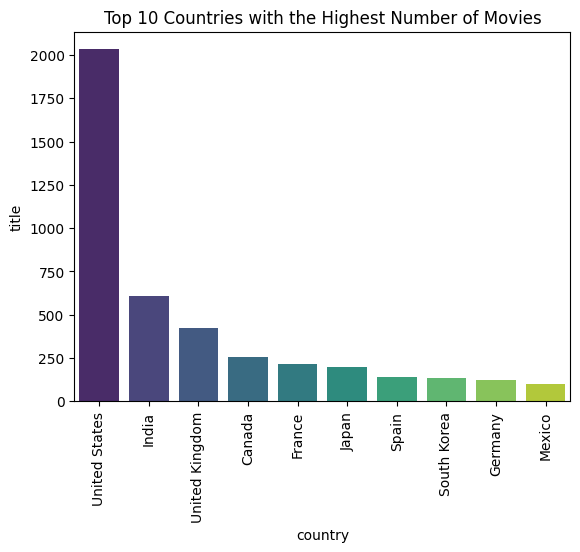

In [41]:
# remove the Unknown country
movie = df[df['country'] != 'Unknown Country']

# Filter the DataFrame to include only movies
movie = movie[movie['type'] == 'Movie']

# Group by 'Country' and count the unique titles of movies for each country
movie_by_country = movie.groupby(['country'])['title'].nunique().reset_index()

# Sort the countries based on the count of movies in descending order
movie_by_country = movie_by_country.sort_values(by='title',ascending=False).reset_index(drop=True)

# Pick the top 10 countries with the highest number of movies
print(movie_by_country[:10])

# Create the Seaborn bar plot for the top 10 countries with the highest number of movies
sns.barplot(y='title', x='country', data=movie_by_country[:10] , palette='viridis')

plt.title('Top 10 Countries with the Highest Number of Movies')
plt.xticks(rotation=90)
# Show the plot

plt.show()


**`Insights:`**

1) United States has the highest number of movies produced on Netflix, with 2032 titles, followed by India with 608 titles, and United Kingdom with 426 titles.
2) There is a significant gap in the number of movies produced between the top country (United States) and the rest of the countries in the top 10 list.

**`Recommendations:`**

1) Focus on Regional Content: While the United States dominates in movie production, Netflix can invest in producing more regional content from other countries in the top 10 list, such as India, United Kingdom, Canada, France, Germany, Spain, Japan, Mexico, and China. This will cater to a broader audience and attract more viewers from these regions.

2) Collaborated with international filmmakers and production studios to produce original content, resulting in increased viewership and engagement from diverse global audiences.






### b. Find the number of Tv-Shows produced in each country and pick the top 10 countries.

          country  title
0   United States    857
1           India    250
2  United Kingdom    169
3          France     98
4           Japan     95
5          Canada     91
6           Spain     69
7     South Korea     69
8         Germany     65
9          Mexico     43


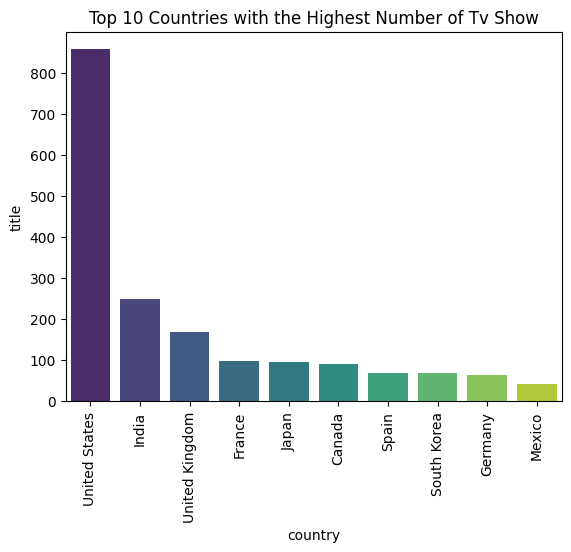

In [42]:
# remove the Unknown country
tv_show = df[df['country'] != 'Unknown Country']

# Filter the DataFrame to include only TV Shows
tv_show = tv_show[tv_show['type'] == 'TV Show']

# Group by 'Country' and count the unique titles of movies for each country
tv_show_by_country = tv_show.groupby(['country'])['title'].nunique().reset_index()

# Sort the countries based on the count of movies in descending order
tv_show_by_country = tv_show_by_country.sort_values(by='title',ascending=False).reset_index(drop=True)

# Pick the top 10 countries with the highest number of movies
print(tv_show_by_country[:10])

# Create the Seaborn bar plot for the top 10 countries with the highest number of movies
sns.barplot(y='title', x='country', data=tv_show_by_country[:10],palette='viridis')

plt.title('Top 10 Countries with the Highest Number of Tv Show')
plt.xticks(rotation=90)
# Show the plot

plt.show()

**`Insights:`**

1. The United States is the top country in terms of producing TV shows on Netflix, with 950 titles, showcasing its dominance in TV show production.

2. The United Kingdom, Japan, and South Korea are also significant contributors to the TV show library on Netflix, with 273, 200, and 174 titles, respectively.

**`Recommendations:`**

1. Strengthen Partnerships: Continue to strengthen partnerships with content creators and production studios in countries like the United Kingdom, Japan, South Korea, and other top countries. Collaborating with local talent can result in compelling and culturally relevant TV shows that resonate with international audiences.

2. Invest in Global Appeal: Focus on producing TV shows with universal themes and storylines that can appeal to a wide range of viewers across different countries. This can lead to increased viewership and global recognition for Netflix original TV shows.

3. Support Local Talent: Encourage and support local talent and emerging TV show creators in countries like India, Taiwan, Australia, and Spain. Providing a platform for these creators can bring fresh and innovative content to the global audience.




# Q3. What is the best time to launch a TV show?

### a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

Best week to release movies:
   week  movie_count
0     1          316

Best week to release TV shows:
    week  tv_show_counts
26    27              86


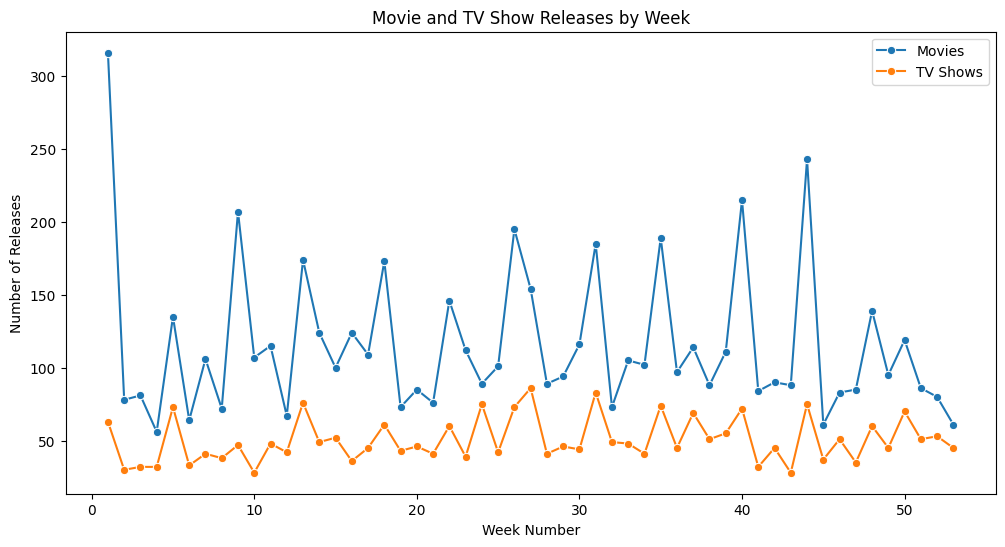

In [43]:
# Separate the dataset into two DataFrames: one for TV shows and one for movies
movie = df[df['type']=='Movie']
tv_show = df[df['type']=='TV Show']

# Group by the week number and count the total number of movies released in each week
movie_show_by_week = movie.groupby(['week']).size().reset_index(name='movie_count')

# Group by the week number and count the total number of TV shows released in each week
tv_show_by_week = tv_show.groupby(['week']).size().reset_index(name='tv_show_counts')

# Find the best week to release movies (highest count)
best_week_movie = movie_show_by_week[movie_show_by_week['movie_count'] == max(movie_show_by_week['movie_count'])]

# Find the best week to release TV shows (highest count)
best_week_tv_show = tv_show_by_week[tv_show_by_week['tv_show_counts'] == max(tv_show_by_week['tv_show_counts'])]


print('Best week to release movies:')
print(best_week_movie)
print()
print('Best week to release TV shows:')
print(best_week_tv_show)

# set the figure size
plt.figure(figsize=(12,6))

# Create the Seaborn line plot for movie releases
sns.lineplot(x='week', y='movie_count', data=movie_show_by_week, marker='o', label='Movies')

# Create the Seaborn line plot for TV show releases
sns.lineplot(x='week', y='tv_show_counts', data=tv_show_by_week, marker='o', label='TV Shows')

# Set the plot labels and title
plt.xlabel('Week Number')
plt.ylabel('Number of Releases')
plt.title('Movie and TV Show Releases by Week')

# Show the legend
plt.legend()

# Show the plot
plt.show()


**`Insights`**

1) For Movies: The first week of the year appears to be the most favorable time to release a movie. During this period, people are celebrating the new year and are more likely to go out and watch films. We can observe that 316 movies have been released during the first week of the year.

2) For TV Shows: The 27th week of the year proves to be an ideal time to release TV shows. This period corresponds to June, which falls during the rainy season in many regions. As people prefer to stay indoors during the rainy season, there is an increased likelihood of viewers choosing to watch TV shows. We can observe that 86 TV shows have been released during the 27th week of the year.

**`Recommendations:`**
1) For Movie: As we can see first week of the year tends to gain more profit and we can recomended to the producer to release in the first week of the month
2) For TV Show: As we can see 27't week falls in june of the year tends to gain more profit and we can recomended to the producer to release in the june month


### b. Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

Best month to release movies:
   month  movie_count
6      7          565

Best month to release TV shows:
    month  tv_show_count
11     12            266


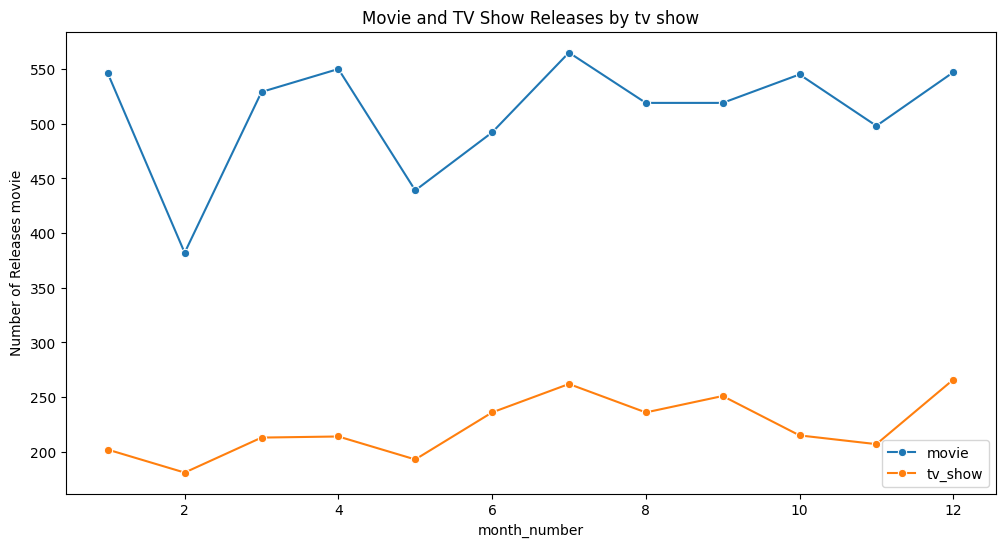

In [44]:
# Separate the dataset into two DataFrames: one for TV shows and one for movies
movie = df[df['type'] == 'Movie']
tv_show = df[df['type'] == 'TV Show']

# Group by the month and count the total number of movies released in each month
movies_by_month = movie.groupby('month').size().reset_index(name='movie_count')

# Group by the month and count the total number of TV shows released in each month
tv_shows_by_month = tv_show.groupby('month').size().reset_index(name='tv_show_count')

# Find the best month to release movies (highest count)
best_month_movies = movies_by_month[movies_by_month['movie_count'] == max(movies_by_month['movie_count'])]

# Find the best month to release TV shows (highest count)
best_month_tv_shows = tv_shows_by_month[tv_shows_by_month['tv_show_count'] == max(tv_shows_by_month['tv_show_count'])]

print('Best month to release movies:')
print(best_month_movies)
print()
print('Best month to release TV shows:')
print(best_month_tv_shows)

# set the figure size
plt.figure(figsize=(12,6))

# Create the Seaborn line plot for movie releases
sns.lineplot(data=movies_by_month,x='month',y='movie_count',marker='o',label='movie')

# Create the Seaborn line plot for TV show releases
sns.lineplot(data=tv_shows_by_month,x='month',y='tv_show_count',marker='o',label='tv_show')

# Set the plot labels and title
plt.xlabel('month_number')
plt.ylabel('Number of Releases movie')
plt.title('Movie and TV Show Releases by tv show')

# Show the legend
plt.legend()
plt.show()

**`Insights`**

1) For Movies: The data shows that the seventh month of the year (July) is the most favorable month to release movies, with a total of 565 movie releases during this period. This indicates that July attracts a significant number of people so better to realase the movie in the month of july.

2) For TV Shows: The 12 month of the year (December) has proven to be the best month to release TV shows, with 266 TV show releases. As December includes the holiday season and year-end festivities, people often have more time, making it an ideal time to launch new TV show seasons and attract a broader audience.
**`Recommendations:`**
1) For Movie: As we can see 7 month july of the year tends to gain more profit and we can recomended to the producer to release in the july month.
2) For TV Show: As we can see 12 month december of the year tends to gain more profit and we can recomended to the producer to release in the december month


# 4. Analysis of actors/directors of different types of shows/movies

### a. Identify the top 10 directors who have appeared in most movies or TV shows.

              director  title_count
0        Rajiv Chilaka           22
1            Jan Suter           21
2          Raúl Campos           19
3         Marcus Raboy           16
4          Suhas Kadav           16
5            Jay Karas           15
6      Youssef Chahine           12
7          Jay Chapman           12
8  Cathy Garcia-Molina           12
9      Martin Scorsese           10


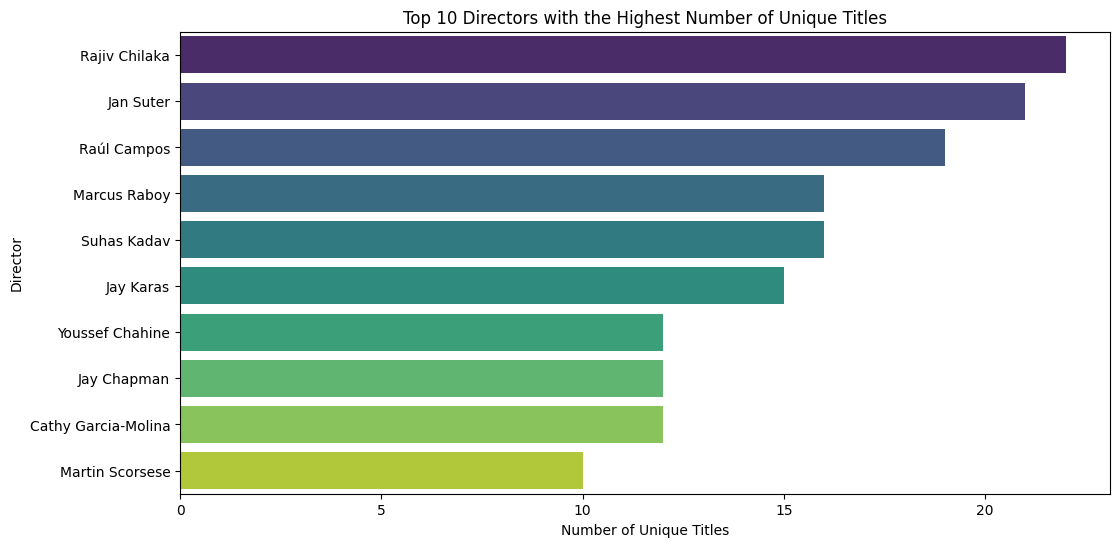

In [45]:
# here there multiple Unknown director first remove them
directors= df[df['director'] != 'Unknown Director']

# Group by each director and count the number of unique titles of TV shows/movies
directors_count = directors.groupby(['director'])['title'].nunique().reset_index(name='title_count')

# Sort the directors based on the count of unique titles in descending order
directors_count= directors_count.sort_values(by='title_count',ascending=False)
                                             
# pick the top 10 director
print(directors_count.reset_index(drop=True).head(10))

# Create the Seaborn bar plot for the top 10 directors
plt.figure(figsize=(12, 6))
sns.barplot(x='title_count', y='director', data=directors_count.head(10), palette='viridis')

# Set the plot labels and title
plt.xlabel('Number of Unique Titles')
plt.ylabel('Director')
plt.title('Top 10 Directors with the Highest Number of Unique Titles')

# Show the plot
plt.show()

**`Insights:`**
1) Jan Suter and Rajiv Chilaka are the top directors with the highest title_count, each having 22 and 21 titles to their credit. This suggests that they are good directors with a significant body of work in the film industry.

2) Raúl Campos, Marcus Raboy, and Suhas Kadav follow closely behind with 19, 16, and 16 titles respectively. These directors are also noteworthy for their substantial contribution to the industry.

**`Recommendations:`** 
1) Given the high title_count of Jan Suter and Rajiv Chilaka, it would be beneficial for other aspiring directors to collaborate with them and produce good films and tv shows.
2) Promoting young talent director in to film industry will be very good to produce new idea and invitation so that young generation people will like the movie.

### b. Identify the top 10 actor who have appeared in most movies or TV shows.


            actor  title_count
0    Rupa Bhimani           22
1   Julie Tejwani           22
2     Rajesh Kava           21
3  Jigna Bhardwaj           19
4    Vatsal Dubey           17
5         Swapnil           14
6          Mousam           14
7  Junko Takeuchi            8
8  Tusshar Kapoor            8
9     David Spade            8


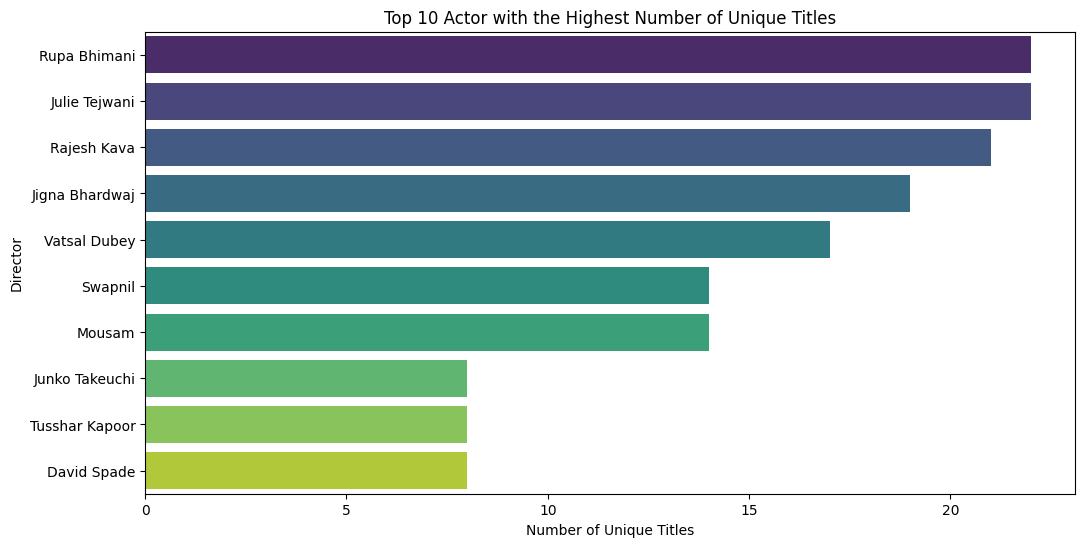

In [46]:
# removing unknown actor from dataframe
actors = df[df['actor'] != 'Unknown Actor']

# Group by each actor and count the number of unique titles of TV shows/movies
actor_count = actors.groupby(['actor'])['title'].nunique().reset_index(name='title_count')

# Sort the cast based on the count of unique titles in descending order
actor_count = actor_count.sort_values(by='title_count',ascending=False)

# pick the top 10 actor
print(actor_count.reset_index(drop=True).head(10))

# Create the Seaborn bar plot for the top 10 directors
plt.figure(figsize=(12, 6))
sns.barplot(data=actor_count.head(10), x='title_count', y='actor', palette='viridis')

# Set the plot labels and title
plt.xlabel('Number of Unique Titles')
plt.ylabel('Director')
plt.title('Top 10 Actor with the Highest Number of Unique Titles')

# Show the plot
plt.show()

**`Insights:`**
1) Rupa Bhimani is the leading actor with the highest title_count, having acted in 22 titles. Julie Tejwani and Rajesh Kava  closely follow, him both having acted in 22 and 21 titles each. This indicates Rupa Bhimani is most active actor and audience likes his acting skills.

**`Recommendations`**
1) Encourage New Talent the industry should also focus on promoting new acting talents. While established actors like Rupa Bhimani and Julie Tejwani have a strong presence, there are numerous emerging actors who bring fresh perspectives and talent to the screen. Providing opportunities and platforms for these newcomers can inject new life into the industry and ensure a continuous of talented actors.



# 5. Which genre movies are more popular or produced more

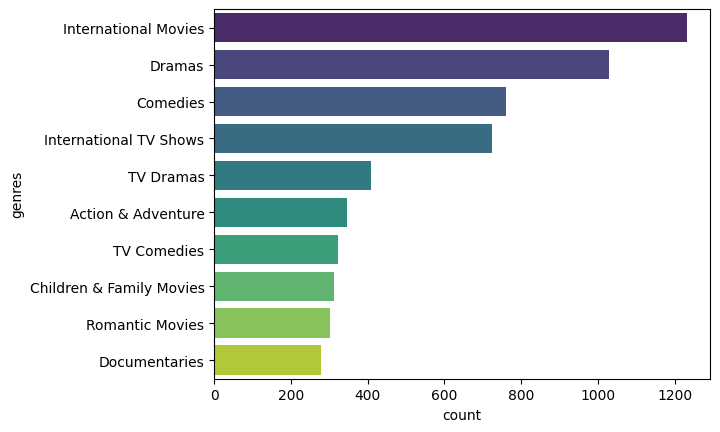

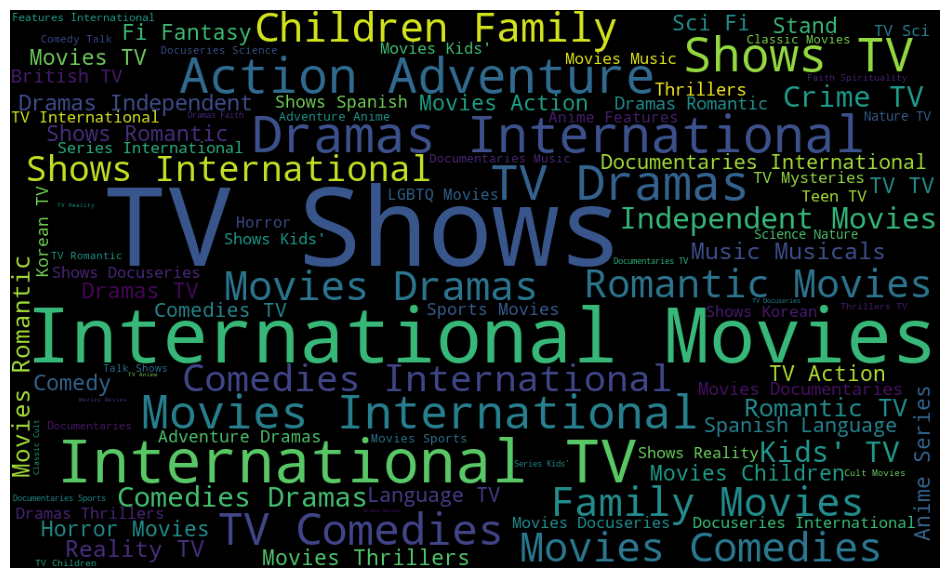

In [47]:
# import WordCloud so that all generes picture u can clearly identity
from wordcloud import WordCloud

# seperating movie genres so that easliy can understand
movie_genre = df[df['type'] == 'Movie']['genres']

# seperating TV Show genres so that easliy can understand
tv_show_genre = df[df['type'] == 'TV Show']['genres']

# concat movie_genre and tv_show_genre
all_genre = pd.concat([movie_genre,tv_show_genre])

# sperate the top geners and show in sns barplot 
top_genre = all_genre.value_counts().reset_index().rename(columns={'index':'genres','genres':'count'})
sns.barplot(data=top_genre[:10],y='genres',x='count',palette='viridis')

wordcloud = WordCloud(width=1000, height=600).generate(' '.join(all_genre))

# Display the word cloud
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**`Insights:`**
1) Most appering catgeory in netflix are  International Movies, Dramas, Comedies and International TV Shows this indicates that viewers has more interset in this type movie.
2) The list includes a wide range of genres, catering to various tastes and preferences of the audience. From action-packed "Action & Adventure" movies to heartwarming "Children & Family Movies," there is something for everyone.

**`Recommendations:`**
1) We must focus more on dramas, International Movie here we can clearly see there lot of audience waiting to watch this type of genre movie.


# 6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)

The mode of time difference between release and addition to Netflix for Movies/TV Show is: 334 days.


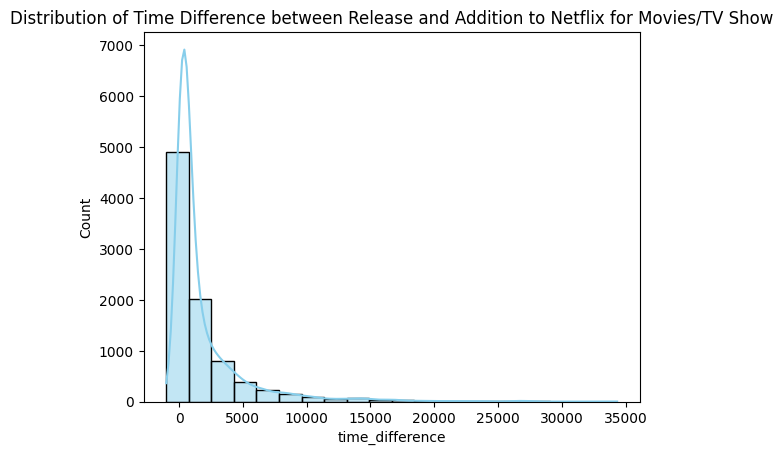

In [48]:
difference = df
# Calculate the time difference between "date_added" and "release_year" in days
difference['time_difference'] = (difference['date_added']-difference['release_year']).dt.days

# Find the mode of the time difference
mode_time_difference = difference['time_difference'].mode().values[0]

print(f"The mode of time difference between release and addition to Netflix for Movies/TV Show is: {mode_time_difference} days.")

# Create the Seaborn histogram for the time difference
sns.histplot(data=difference,x='time_difference', bins=20, kde=True, color='skyblue')

# set the title name
plt.title('Distribution of Time Difference between Release and Addition to Netflix for Movies/TV Show')

# Show the plot
plt.show()


**`Insights:`**

1. The mode of time difference between the release of a movie and TV Show to Netflix is approximately 344 days. This means that, on average, movies/TV Show take around 344 days (about 1 year) to be available on the platform after their initial release.

Recommendations:

1. If you're excited about watching the latest blockbuster movies as soon as they're released, consider going to the theaters. Waiting for almost two years for a movie to appear on Netflix can be a long time, especially for highly anticipated titles.

2. Since TV shows tend to become available on Netflix faster than movies, consider exploring the platform's original TV shows and series. Netflix produces a wide range of high-quality original content, spanning various genres and themes, and these shows are often available for streaming sooner.


# Year wise count of of Movies and TV Shows visible on Netflix

In [49]:
# group by year when the film is added in netflix
df.groupby('year')['type'].count().reset_index()

,year,type
0,2003,2
1,2008,3
2,2009,2
3,2010,2
4,2011,13
5,2012,4
6,2013,12
7,2014,24
8,2015,84
9,2016,430


* Number of Movies increasing after 2018 and decresing after 2020, specially in 2021. Probably due to COVID

# Number of Movies/TV Shows available in US

In [50]:
df.loc[df['country'] == 'United States']['type'].value_counts()

Movie      2037
TV Show     857
Name: type, dtype: int64

# Number of Movies/TV Shows available in India

In [51]:
df.loc[df['country'] == 'India']['type'].value_counts()

Movie      608
TV Show    250
Name: type, dtype: int64

* As we can see that more number Movie/TV Shows are from United States

# Year wise count of Movies/TV Shows for each directors

              director  year_min  year_max  type_count
0        Rajiv Chilaka      2016      2021          22
1            Jan Suter      2015      2019          21
2          Raúl Campos      2014      2020          19
3         Marcus Raboy      2011      2020          16
4          Suhas Kadav      2018      2021          16
5            Jay Karas      2017      2020          15
6      Youssef Chahine      2020      2021          12
7          Jay Chapman      2011      2019          12
8  Cathy Garcia-Molina      2018      2020          12
9      Martin Scorsese      2017      2021          10


<AxesSubplot: xlabel='type_count', ylabel='director'>

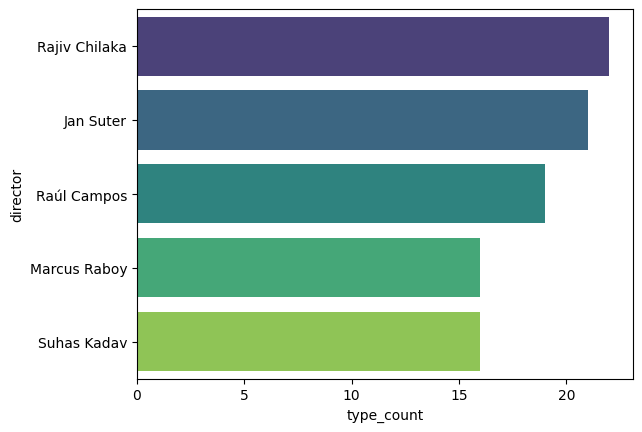

In [52]:
# remove unknown director
director = df[df['director'] != 'Unknown Director']
director = director.groupby(['director'])['year','type'].agg({'year':['min','max'],'type':'count'})
director.columns  = ['_'.join(col) for col in director.columns]
director.reset_index(inplace=True)
director.sort_values('type_count',ascending=False,inplace=True)
director = director.reset_index(drop=True)[:10]
print(director)
sns.barplot(data=director[:5], y='director',x='type_count',palette='viridis')
# plt.xticks(rotation = 90)
# plt.axis('off')

#  How is the best director

In [53]:
director = df[df['director'] != 'Unknown Director']
director = director.groupby(['director'])['year','title'].agg({'year':['min','max'],'title':'count'})
director.columns  = ['_'.join(col) for col in director.columns]
director = director.reset_index()
director['difference'] = director['year_max']-director['year_min']
director['best_director'] =  round(director['title_count']/director['difference'],2)
director.sort_values(by=['title_count','difference','best_director'],ascending=[False,False,False])[:10].reset_index(drop=True)


,director,year_min,year_max,title_count,difference,best_director
0,Rajiv Chilaka,2016,2021,22,5,4.40
1,Jan Suter,2015,2019,21,4,5.25
2,Raúl Campos,2014,2020,19,6,3.17
3,Marcus Raboy,2011,2020,16,9,1.78
4,Suhas Kadav,2018,2021,16,3,5.33
5,Jay Karas,2017,2020,15,3,5.00
6,Jay Chapman,2011,2019,12,8,1.50
7,Cathy Garcia-Molina,2018,2020,12,2,6.00
8,Youssef Chahine,2020,2021,12,1,12.00
9,Martin Scorsese,2017,2021,10,4,2.50


# Count of Movie and TV show in each country

type         country  Movie  TV Show
0      United States   2037      857
1              India    608      250
2     United Kingdom    426      169
3             Canada    255       91
4             France    215       98
5              Japan    198       95
6              Spain    141       69
7        South Korea    134       69
8            Germany    121       65
9             Mexico    103       43


Text(0.5, 1.0, 'Counts of Movies and TV Shows for Each Country')

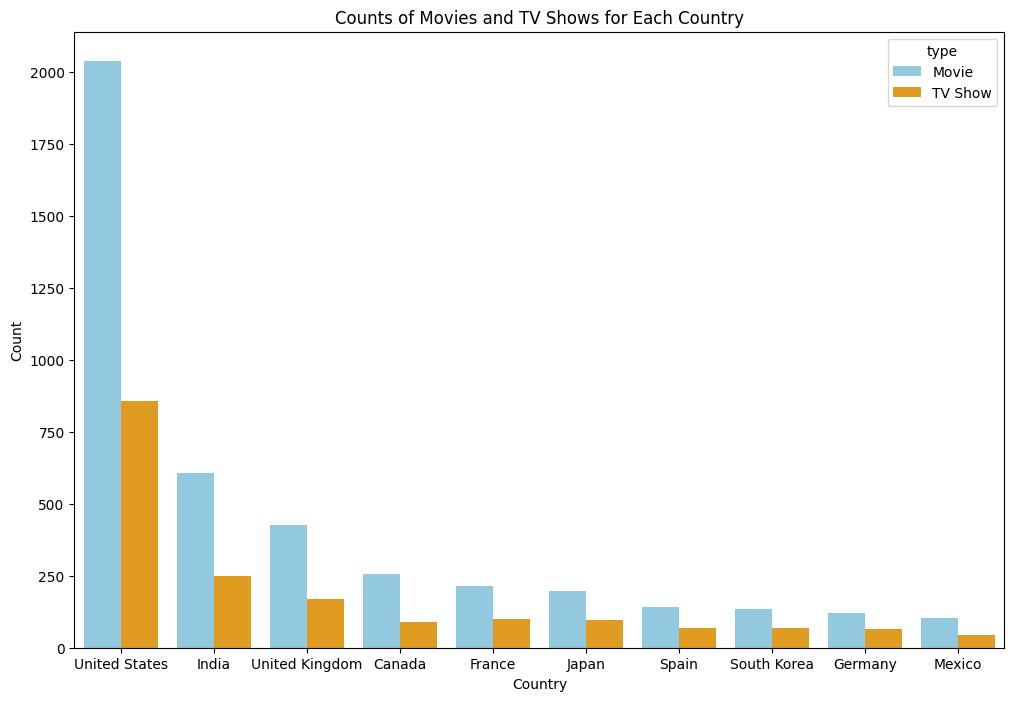

In [54]:
country_type_counts = df[df['country'] != 'Unknown Country']
country_type_counts = country_type_counts.groupby(['country','type'])['type'].size().unstack(fill_value=0)
country_type_counts = country_type_counts.reset_index().sort_values(by=['Movie','TV Show'],ascending=False)
country_type_counts = country_type_counts[:10].reset_index(drop=True)
df_melt = country_type_counts.melt(id_vars='country',value_vars=['Movie','TV Show'],var_name='type',value_name='counts')
print(country_type_counts)
plt.figure(figsize=(12, 8))
sns.barplot(data=df_melt,x='country',y='counts',hue='type',palette=['skyblue', 'orange'])
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Counts of Movies and TV Shows for Each Country')

# Best director for Movie 

In [55]:
director = df[df['director']!='Unknown Director']
director = director[df['type']=='Movie']
director['director'].value_counts()[:10]


Jan Suter              18
Rajiv Chilaka          16
Suhas Kadav            14
Raúl Campos            12
Marcus Raboy           11
Cathy Garcia-Molina    11
Jay Karas              10
Jay Chapman             9
David Dhawan            8
Yılmaz Erdoğan          8
Name: director, dtype: int64

# Best director for TV Show

In [56]:
director = df[df['director']!='Unknown Director']
director = director[df['type']=='TV Show']
director['director'].value_counts()[:10]

Raúl Campos         7
Rajiv Chilaka       6
Leslie Small        6
Fernando Ayllón     6
Hidenori Inoue      5
Marcus Raboy        5
Youssef Chahine     5
Jay Karas           5
Joey So             4
John G. Avildsen    4
Name: director, dtype: int64

# `Business Insights`

- As per Dataset most of the movies & TV Shows are directed by Jan Suter  followed by Raúl Campos and Rajiv Chilaka
- Netflix started adding more and more TV Shows as the demand for the same is growing
- After 2019 there is a dip in the count of Movies and TV Shows, which may be the COVID effect
- Most directed movies on Netflix are directed by Rajiv Chilaka (As per Data Set)
- Highest percentile rating is for TV-MA (Mature Audience)
- The most number of Movies and TV Shows available in the US followed by INDIA
- International Movies genre contains the highest number of Movies/TV Shows, i.e. 1231 followed by Drams Movies i.e. 1029
- Estimate duration of any Show is around 200 minutes mostly
- July & December is the Month when most Movies & TV Shows are added to Netflix.

# **`Recommendations`**

- As the popularity of TV Shows increases, Netflix should focus on TV Shows as well. This step can help Netflix to increase its user base
- India is the second largest user base for Netflix, Netflix should focus on more such content which can work efficiently in India
- Netflix should focus on the Comedy, Action & Adventure genres as these genres have great potential and are currently in a growing state (On Netflix's platform)
- After Covid Period, i.e. after 2020, Netflix should focus on increasing the number of contents

**`Movies:`** 
* Preferd movies duration is between 90-100 minutes. 
* Netflix should add more movies for United States and India falling in category of International movies and comedies
* Netflix should add more movies for United States and India having rating of TV-MA & TV-14. 
* Top three countries where movies added are United States, India & United Kingdom.
*  Netflix shoud add TV Show on Friday than any other weekday.

**`TV Show:`** 
* Preferd movies duration is 1-2 seeasons.
* Netflix should focus on countries like Japan, South Korea and France in TV shows , as they prefer TV shows over movies. 
* Netflix shoud add TV Show on Friday than other weekday.
* As per 2021 data, count of TV showes are more than movies , this means people wants more web-series as they have for leisure time may be due to work from home scenario. 


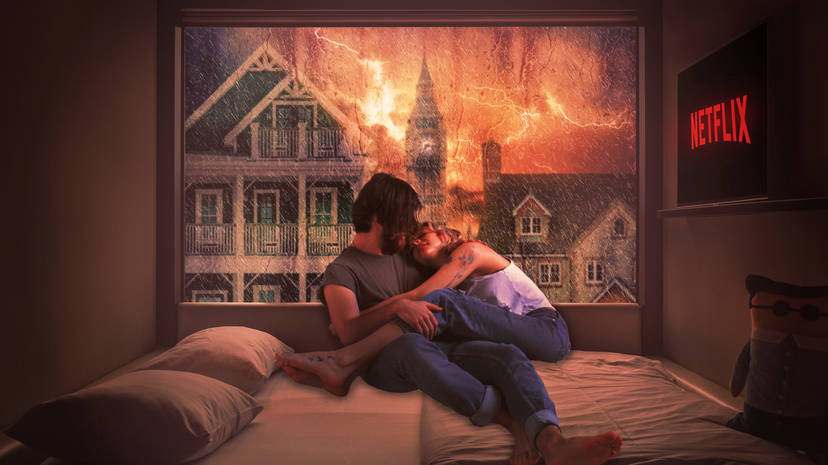